# # Example 5. Navigation in output folder using DataFolder

# DataFolder class


DataFolder class is designed to make navigation accross the output director easier and increase readability of the code.

To create DataFolder object, run
```python
my_datafolder = nextnanopy.DataFolder('path_to_output_directory')
```

_Hint: if you run nextnano in the same script you are reading the output, you can extract path to output directory after execution as below_

```python 
inpuitFile.execute()
#some other code
output_directory = inputFile.folder_output()
```

In [1]:
import nextnanopy as nn

my_datafolder = nn.DataFolder(r'E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_package\nextnanopy\docs\examples\ouput_files\example_folder')
print(my_datafolder)

DataFolder
fullpath: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_package\nextnanopy\docs\examples\ouput_files\example_folder
Folders: 3
bias_00000
Strain
Structure
Files:
['bias_points.log', 'example_folder.in', 'example_folder.log', 'grid_x.dat', 'job_done.txt', 'simulation_database.txt', 'simulation_info.txt', 'simulation_input.txt', 'variables_database.txt', 'variables_input.txt']


DataFolder object contains 3 attributes:

```python
        fullpath: str
            path to a file
        folders: DictList
            subfolders of the DataFolder,
            keys: str
                names of subfolders
            values: DataFolder
                DataFolder objects of subfolders
        files: list
            paths to files in folder
```

Sometimes it is useful to look down the whole content of the folder including the subfolders. To do so, one can use DataFolder.show_tree() to preview the folder.

_Note: Some simulations contains hundreds of files, so ```show_tree()``` can have a nasty output._


In [2]:
my_datafolder.show_tree()

example_folder/
    bias_00000/
        Optics/
            absorption_quantum_region_kp8_TE_cm-1.dat
            absorption_quantum_region_kp8_TE_eV.dat
            absorption_quantum_region_kp8_TE_nm.dat
            absorption_quantum_region_kp8_TE_THz.dat
            absorption_quantum_region_kp8_TM_cm-1.dat
            absorption_quantum_region_kp8_TM_eV.dat
            absorption_quantum_region_kp8_TM_nm.dat
            absorption_quantum_region_kp8_TM_THz.dat
            energy_spectrum_quantum_region_kp8.dat
            im_epsilon_quantum_region_kp8_TE_cm-1.dat
            im_epsilon_quantum_region_kp8_TE_eV.dat
            im_epsilon_quantum_region_kp8_TE_nm.dat
            im_epsilon_quantum_region_kp8_TE_THz.dat
            im_epsilon_quantum_region_kp8_TM_cm-1.dat
            im_epsilon_quantum_region_kp8_TM_eV.dat
            im_epsilon_quantum_region_kp8_TM_nm.dat
            im_epsilon_quantum_region_kp8_TM_THz.dat
        Quantum/
            Bulk_dispersions/
          

# Navigation in the DataFolder


Navigation among folders can be done in 3 ways:

            1. DataFolder.folders['folder_name']
            
            2. DataFolder.go_to('subfolder1', 'subfolder2', 'subfolder3')
            
            3. DataFolder.subfolder1.subfolder2.subfolder3
            
_Note: The last method does not work if names of subfolders include dots '.'. While the default naming of subfolders in nextnano fulfill this rule, be aware of it if you change the names of directories for some reason._
            
The example for each method is given below:

In [3]:
strain_folder = my_datafolder.folders['Strain']
bulk_dispersions_folder = my_datafolder.go_to('bias_00000', 'Quantum', 'Bulk_dispersions')
dispersins_folder = my_datafolder.bias_00000.Optics
print(strain_folder)

DataFolder
fullpath: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_package\nextnanopy\docs\examples\ouput_files\example_folder\Strain
Folders: 0
Files:
['elastic_energy_density.dat', 'hydrostatic_strain.dat', 'strain_simulation.dat']


To get the absolute path of certain files, use DataFolder.file('name_of_the_file') method:

In [4]:
hydrostatic_strain_file = strain_folder.file('hydrostatic_strain.dat')
bulk_bandstructure = bulk_dispersions_folder.file('bulk_dispersion_quantum_region_kp8_user_defined_path_GeWell.dat')
print(hydrostatic_strain_file)

E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_package\nextnanopy\docs\examples\ouput_files\example_folder\Strain\hydrostatic_strain.dat


Now you can convert it to nextnanopy.DataFile for further processing (for example, plotting)


[Warning] nextnano product is not specified: nextnano++, nextnano3, nextnano.NEGF or nextnano.MSB
[Warning] Autosearching for the best loading method. Note: The result may not be correct
[Warning] nextnano product is not specified: nextnano++, nextnano3, nextnano.NEGF or nextnano.MSB
[Warning] Autosearching for the best loading method. Note: The result may not be correct
DataFile
fullpath: E:\nextnano Users\heorhii.yehiazarian\nextnanopy\nextnanopy_package\nextnanopy\docs\examples\ouput_files\example_folder\bias_00000\Quantum\Bulk_dispersions\bulk_dispersion_quantum_region_kp8_user_defined_path_GeWell.dat
Coordinates: 0 datasets
Variables: 9 datasets
	name: |k| - unit: 1/nm - shape: (21,)
	name: Band_1 - unit: eV - shape: (21,)
	name: Band_2 - unit: eV - shape: (21,)
	name: Band_3 - unit: eV - shape: (21,)
	name: Band_4 - unit: eV - shape: (21,)
	name: Band_5 - unit: eV - shape: (21,)
	name: Band_6 - unit: eV - shape: (21,)
	name: Band_7 - unit: eV - shape: (21,)
	name: Band_8 - unit: 

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='|k|[1/nm]', ylabel='Energy[eV]'>)

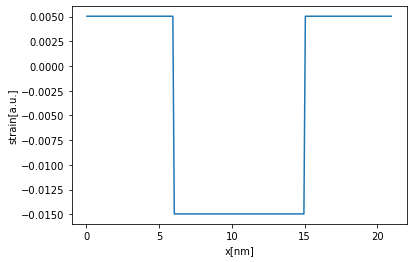

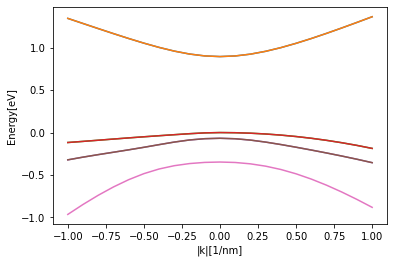

In [5]:
strain_datafile = nn.DataFile(hydrostatic_strain_file)
strain_datafile.plot(y_axis_name = 'strain')
bandstructure_datafile = nn.DataFile(bulk_bandstructure)
print(bandstructure_datafile)
bandstructure_datafile.plot(y_axis_name = 'Energy')

_Note: if DataFile contains no variables, the first variable is taken as coordinate to plot(as in example for bandstructure, |k| is a variable, but used as coordinate to plot_

# Find the files by keyword

The DataFodlder class can be also used to find files with a certain keyword.

``` python
DataFolder.find('keyword', deep = False) #-> return list of files containing a keyword in the current directory 
DataFolder.find('keyword', deep = True ) #-> return list of files containing a keyword in the current directory and all subdirectories 
```

The default value of ```deep``` is False.

In [6]:
my_datafolder.find('density', deep = False)


[]

In [7]:
my_datafolder.find('variables', deep = False)

['E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\variables_database.txt',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\variables_input.txt']

In [8]:
my_datafolder.find('density', deep = True)

['E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\bias_00000\\density_acceptor_ionized.dat',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\bias_00000\\density_donor_ionized.dat',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\bias_00000\\density_electron.dat',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\bias_00000\\density_hole.dat',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\Strain\\elastic_energy_density.dat',
 'E:\\nextnano Users\\heorhii.yehiazarian\\nextnanopy\\nextnanopy_package\\nextnanopy\\docs\\examples\\ouput_files\\example_folder\\Structure\\density_don

This can be used, for example, to plot all files containing keyword 'density'

In [9]:
all_densities = my_datafolder.find('density', deep = True)

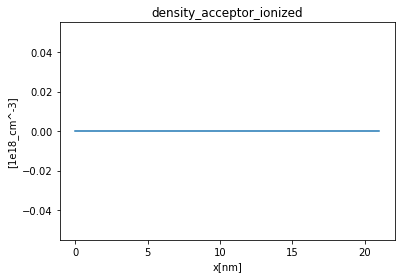

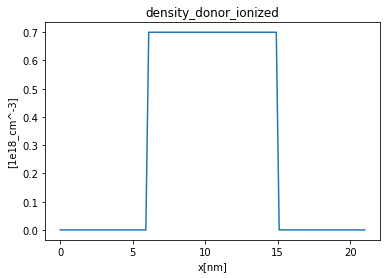

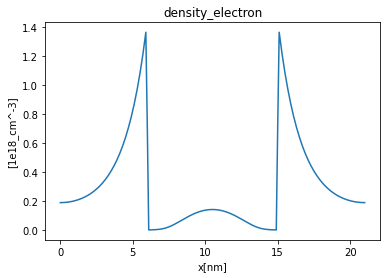

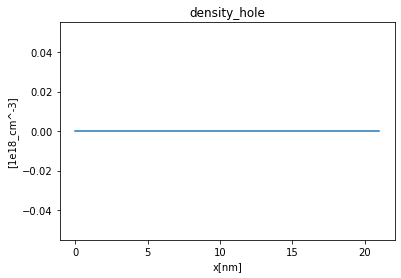

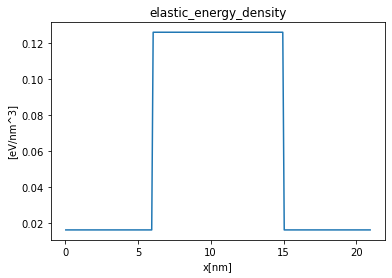

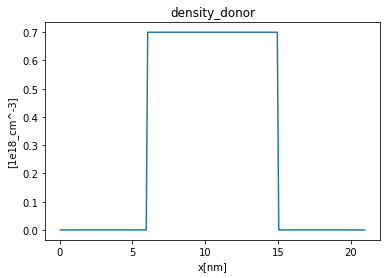

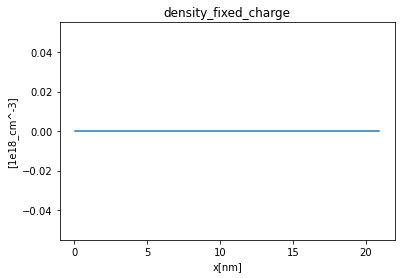

In [10]:
import matplotlib.pyplot as plt

for density in all_densities:
    density_df = nn.DataFile(density, product = 'nextnano++')
    filename = density_df.filename_only
    density_df.plot()
    plt.title(filename)



Please contact python@nextnano.com for any issues with this document.